##Problem statement
Mobile carrier Megaline has found out that many of their subscribers use legacy plans.
They want to develop a model that would analyze subscribers' behavior and recommend
one of Megaline's newer plans: Smart or Ultra.

##Metric of success
Develop a model with the highest possible accuracy >= 0.75 to be able to recommend either of Smart or Ultra plans

In [26]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error



###Reading the data and preview

In [21]:
#read the data and preview the data
users_df = pd.read_csv('users_behavior.csv')
print(users_df.head())
print(users_df.shape)



   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0
(3214, 5)


2

###Data preparation and cleaning


In [22]:
#check for missing value, variable datatype
users_df.columns #columns names standardised
users_df.isnull().sum() #no missing value
users_df.dtypes #all variable are numeric, good for regression methods prediction
users_df.duplicated().sum() #no duplicated observations
users_df.nunique() #is_ultra has two values 0,1 - categorical

calls        184
minutes     3144
messages     180
mb_used     3203
is_ultra       2
dtype: int64

###Model traning and prediction

In [37]:
#create train, validation and test dataset from source dataset
features =users_df.drop(columns='is_ultra')
target = users_df['is_ultra']

#separate source dataset into train, test. declare the feature and target variable
features_train, features_test_valid = train_test_split(features, test_size=0.4, random_state=12345)
target_train, target_test_valid = train_test_split(target, test_size=0.4, random_state=12345)
features_valid, features_test = train_test_split(features_test_valid, test_size=0.5, random_state=12345)
target_valid, target_test = train_test_split(target_test_valid, test_size=0.5, random_state=12345)

#check the shape of the split datasource
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

#model training and prediction. 
#the target variable is categorical so preferrably use categorical algorithms
#decision tree classifier

#find the best tree depth with best accuracy
for depth in range(1,10, 1):
  tree = DecisionTreeClassifier(max_depth=depth, random_state=12345)
  tree.fit(features_train, target_train)
  print(f'Tree accuracy with Validation: {tree.score(features_valid, target_valid)} at depth of: {depth}')
  
#find the best n estimator for random forest with best accuracy
for n in range(1,10, 1):
  tree = RandomForestClassifier(n_estimators=n, random_state=12345)
  tree.fit(features_train, target_train)
  print(f'Forest accuracy with Validation: {tree.score(features_valid, target_valid)} for n trees: {n}')

#declare a model for logistic regression
log = LogisticRegression(random_state=1234, solver='liblinear')
log.fit(features_train, target_train)
print(f'logistic regression has accuracy of: {log.score(features_valid, target_valid)}')



(1928, 4)
(643, 4)
(643, 4)
Tree accuracy with Validation: 0.7542768273716952 at depth of: 1
Tree accuracy with Validation: 0.7822706065318819 at depth of: 2
Tree accuracy with Validation: 0.7853810264385692 at depth of: 3
Tree accuracy with Validation: 0.7791601866251944 at depth of: 4
Tree accuracy with Validation: 0.7791601866251944 at depth of: 5
Tree accuracy with Validation: 0.7838258164852255 at depth of: 6
Tree accuracy with Validation: 0.7822706065318819 at depth of: 7
Tree accuracy with Validation: 0.7791601866251944 at depth of: 8
Tree accuracy with Validation: 0.7822706065318819 at depth of: 9
Forest accuracy with Validation: 0.7107309486780715 for n trees: 1
Forest accuracy with Validation: 0.7636080870917574 for n trees: 2
Forest accuracy with Validation: 0.7387247278382582 for n trees: 3
Forest accuracy with Validation: 0.7713841368584758 for n trees: 4
Forest accuracy with Validation: 0.749611197511664 for n trees: 5
Forest accuracy with Validation: 0.7807153965785381 f

##Finding for accuracy of model
random forest and decision tree model have the best accuracy compared to logistic regression. for the same depth of tree decision tree has better accuracy than forest. decision tree is faster than random forest therefore the recommended model is decision tree with depth of 2 with accuracy of 0.7822 > 0.75

#Testing the models with test data


Tree accuracy with test: 0.7838258164852255


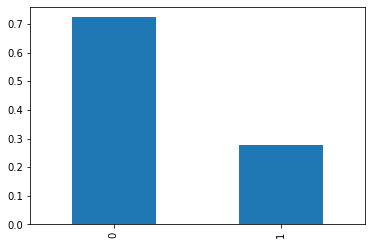

In [46]:
print(f'Tree accuracy with test: {tree.score(features_test, target_test)}')
#assume data from Megaline is the test dataset.
#predict the the mobile plan whether is ultra or no
predicts_test = pd.Series(tree.predict(features_test), index=target_test.index)
#get the frequecy of people on each plan
plan_frequency = predicts_test.value_counts(normalize=True)
plan_frequency.plot(kind='bar')

##finding and recommendation
* Given a set of data of calls, minutes, messages and mb_used, it is possible to predict the most preferred mobile plan using a model.
* most people are on Smart plan